In [4]:
from PIL import Image

In [19]:
im=Image.open('dog.jpg')

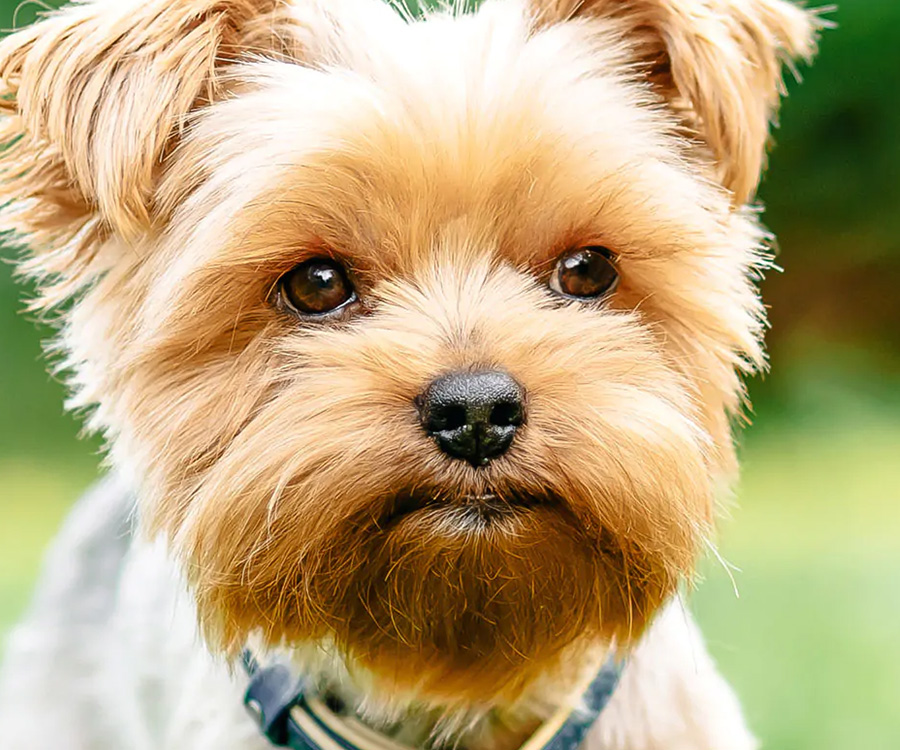

In [20]:
im

# Pretrained Resnet50

In [1]:
!pip install --no-cache-dir pillow

In [11]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
import requests
from io import BytesIO

In [12]:
# Check if GPU is available
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")
print(f"Using device: {device}")

Using device: cpu


In [13]:
# Load pre-trained ResNet50 model
model = models.resnet50(pretrained=True)
model = model.to(device)
model.eval()  # Set the model to evaluation mode

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [14]:
# Define image transformations
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

The image is classified as: Yorkshire Terrier


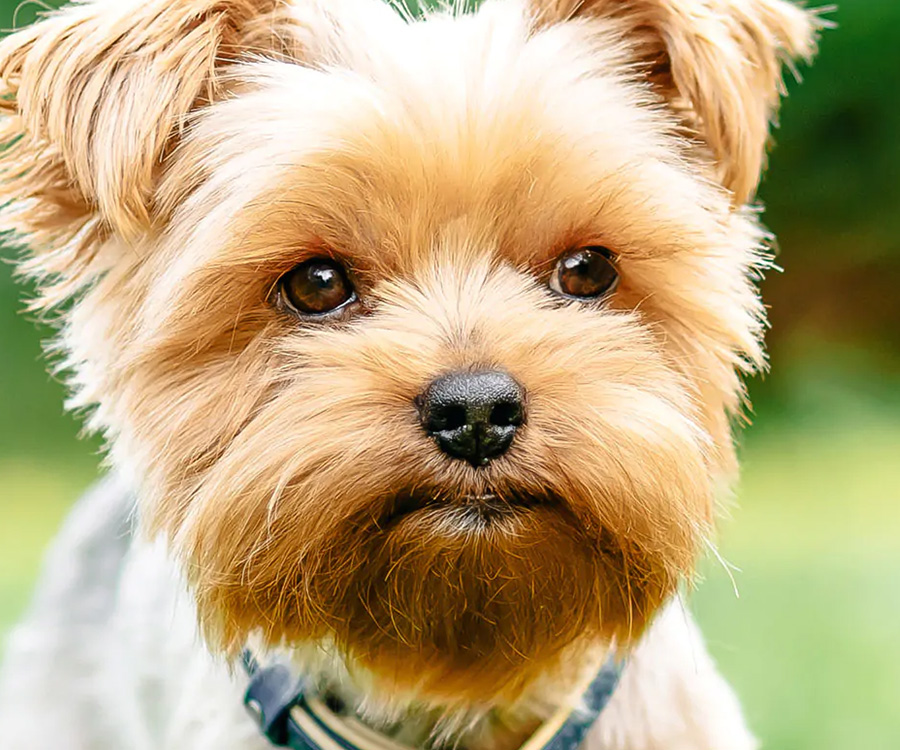

In [22]:
import torch
import torch.nn.functional as F

# Load and preprocess an image
img_t = transform(im)
batch_t = torch.unsqueeze(img_t, 0).to(device)

# Run inference
with torch.no_grad():
    output = model(batch_t)

# Apply softmax to get probabilities
probabilities = F.softmax(output, dim=1)

# Get top 5 predictions
top5_prob, top5_catid = torch.topk(probabilities, 5)

# Load ImageNet class labels
import json
import urllib.request

classes_url = "https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json"
with urllib.request.urlopen(classes_url) as url:
    labels = json.loads(url.read().decode())

# Print top 5 predictions with their probabilities
print("Top 5 predictions:")
for i in range(top5_prob.size(1)):
    print(f"{labels[top5_catid[0][i]]}: {top5_prob[0][i].item()*100:.2f}%")

# Get the top predicted class
classification = labels[top5_catid[0][0]]

print(f"\nThe image is classified as: {classification} with {top5_prob[0][0].item()*100:.2f}% confidence")

# Display the image
from IPython.display import display
display(im)

In [21]:
print(f"Image mode: {im.mode}")
print(f"Image size: {im.size}")

Image mode: RGB
Image size: (900, 750)
